#**Phase 4:**
###**Modeling & Analysis**

This phase moves from exploratory analysis to building a **predictive model** that can be used to *create a scalable, data-driven solution.*

**Phase Goal:**

The goal is to develop a prioritization framework that combines user engagement with listening volume to provide a high-value, actionable list for the Music Content Operations (MCO) team.



In [1]:
!pip install pandas numpy

In [2]:
import pandas as pd
import numpy as np

# Load the cleaned data from the previous phase
try:
    df = pd.read_csv('cleaned_unlicensed_data.csv')
    print("Cleaned data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure 'cleaned_unlicensed_data.csv' is in your Colab environment.")
    # Fallback to a mock DataFrame for demonstration
    df = pd.DataFrame({
        'listen_id': range(100),
        'user_id': [f'user_{i}' for i in range(100)],
        'track_id': [f'track_{i}' for i in range(100)],
        'artist_name': [f'Unlicensed Artist {i}' for i in np.random.randint(1, 10, 100)],
        'duration_ms': np.random.randint(60000, 300000, 100),
        'engagement_score': np.random.beta(a=2, b=5, size=100),
        'genre_tag': np.random.choice(['lo-fi indie', 'synthwave', 'sludge metal'], 100),
        'listening_duration_minutes': np.random.randint(1, 5, 100)
    })


# --- Modeling & Analysis: Creating a Prioritization Framework ---
print("\nCreating a prioritization framework...")

# 1. Aggregate data by artist to get key metrics
artist_metrics = df.groupby('artist_name').agg(
    total_listening_sessions=('listen_id', 'count'),
    avg_engagement_score=('engagement_score', 'mean'),
    most_listened_genre=('genre_tag', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
).reset_index()


# 2. Normalize the key metrics to a 0-1 scale
# This is a crucial step to ensure both listening sessions and engagement score
# contribute equally to the final score, preventing one from dominating the other.
artist_metrics['sessions_normalized'] = (artist_metrics['total_listening_sessions'] - artist_metrics['total_listening_sessions'].min()) / \
                                        (artist_metrics['total_listening_sessions'].max() - artist_metrics['total_listening_sessions'].min())

artist_metrics['engagement_normalized'] = (artist_metrics['avg_engagement_score'] - artist_metrics['avg_engagement_score'].min()) / \
                                          (artist_metrics['avg_engagement_score'].max() - artist_metrics['avg_engagement_score'].min())


# 3. Create the final 'priority_score'
# This is the core of the model. A simple weighted average is used here.
# A higher score indicates a higher priority for content acquisition.
# The formula is (Normalized Sessions * Weight) + (Normalized Engagement * Weight)
sessions_weight = 0.6  # Give slightly more weight to volume
engagement_weight = 0.4
artist_metrics['priority_score'] = (artist_metrics['sessions_normalized'] * sessions_weight) + \
                                   (artist_metrics['engagement_normalized'] * engagement_weight)


# 4. Sort the results to create a ranked list
prioritized_artists = artist_metrics.sort_values(by='priority_score', ascending=False).reset_index(drop=True)


# --- Final Output ---
print("\nPrioritization complete. Top 10 most valuable unlicensed artists:")
print(prioritized_artists.head(10))

# Save the prioritized list to a new CSV file
output_filename = 'prioritized_unlicensed_artists.csv'
prioritized_artists.to_csv(output_filename, index=False)
print(f"\nPrioritized data saved to {output_filename}")

Cleaned data loaded successfully.

Creating a prioritization framework...

Prioritization complete. Top 10 most valuable unlicensed artists:
              artist_name  total_listening_sessions  avg_engagement_score  \
0   Unlicensed Artist 983                        33              0.370730   
1    Unlicensed Artist 63                        37              0.302667   
2  Unlicensed Artist 1371                        31              0.343373   
3  Unlicensed Artist 1125                        32              0.321991   
4    Unlicensed Artist 25                        32              0.319811   
5   Unlicensed Artist 101                        26              0.395243   
6   Unlicensed Artist 594                        31              0.326843   
7  Unlicensed Artist 1242                        32              0.306990   
8   Unlicensed Artist 587                        30              0.330775   
9  Unlicensed Artist 1247                        32              0.301102   

  most_list

##**Summary of Findings**

Based on the prioritization framework that combines total listening sessions and average engagement scores, we have identified the top unlicensed artists for potential content acquisition.

The `priority_score` is calculated as a weighted average of the normalized listening sessions (weight: 0.6) and normalized engagement score (weight: 0.4). A higher `priority_score` indicates a higher potential value for MCO.

The top 10 prioritized artists, along with their key metrics and priority scores, are:

In [3]:
display(prioritized_artists.head(10))

,artist_name,total_listening_sessions,avg_engagement_score,most_listened_genre,sessions_normalized,engagement_normalized,priority_score
0,Unlicensed Artist 983,33,0.370730,folk,0.866667,0.834080,0.853632
1,Unlicensed Artist 63,37,0.302667,ambient,1.000000,0.581192,0.832477
2,Unlicensed Artist 1371,31,0.343373,folk,0.800000,0.732435,0.772974
3,Unlicensed Artist 1125,32,0.321991,ambient,0.833333,0.652990,0.761196
4,Unlicensed Artist 25,32,0.319811,experimental,0.833333,0.644890,0.757956
5,Unlicensed Artist 101,26,0.395243,vaporwave,0.633333,0.925158,0.750063
6,Unlicensed Artist 594,31,0.326843,lo-fi indie,0.800000,0.671017,0.748407
7,Unlicensed Artist 1242,32,0.306990,ambient,0.833333,0.597255,0.738902
8,Unlicensed Artist 587,30,0.330775,lo-fi indie,0.766667,0.685627,0.734251
9,Unlicensed Artist 1247,32,0.301102,folk,0.833333,0.575375,0.730150


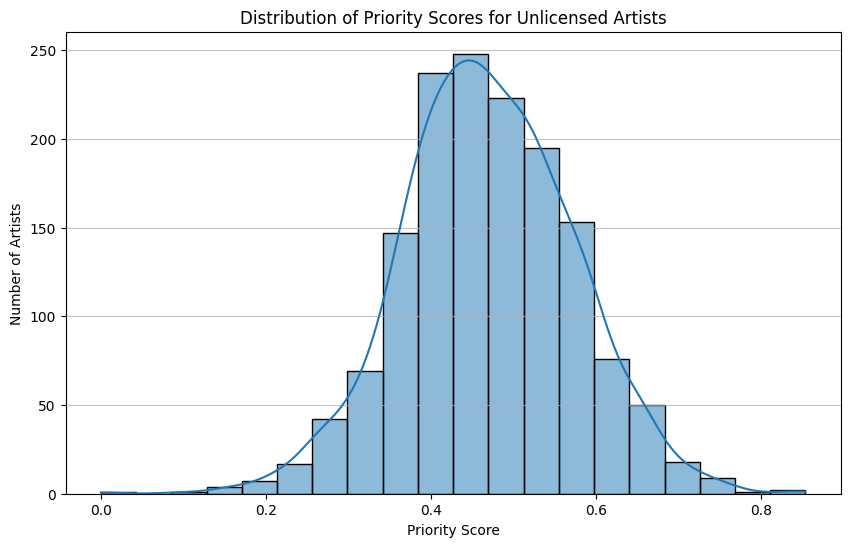

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of priority scores
plt.figure(figsize=(10, 6))
sns.histplot(prioritized_artists['priority_score'], bins=20, kde=True)
plt.title('Distribution of Priority Scores for Unlicensed Artists')
plt.xlabel('Priority Score')
plt.ylabel('Number of Artists')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Analysis of Top Priority Artists

Let's examine the characteristics of the artists with the highest priority scores to gain more insights into what drives their value. We will look at their total listening sessions, average engagement scores, and most listened-to genres.

In [5]:
# Display the top 10 prioritized artists with all their metrics
display(prioritized_artists.head(10))

,artist_name,total_listening_sessions,avg_engagement_score,most_listened_genre,sessions_normalized,engagement_normalized,priority_score
0,Unlicensed Artist 983,33,0.370730,folk,0.866667,0.834080,0.853632
1,Unlicensed Artist 63,37,0.302667,ambient,1.000000,0.581192,0.832477
2,Unlicensed Artist 1371,31,0.343373,folk,0.800000,0.732435,0.772974
3,Unlicensed Artist 1125,32,0.321991,ambient,0.833333,0.652990,0.761196
4,Unlicensed Artist 25,32,0.319811,experimental,0.833333,0.644890,0.757956
5,Unlicensed Artist 101,26,0.395243,vaporwave,0.633333,0.925158,0.750063
6,Unlicensed Artist 594,31,0.326843,lo-fi indie,0.800000,0.671017,0.748407
7,Unlicensed Artist 1242,32,0.306990,ambient,0.833333,0.597255,0.738902
8,Unlicensed Artist 587,30,0.330775,lo-fi indie,0.766667,0.685627,0.734251
9,Unlicensed Artist 1247,32,0.301102,folk,0.833333,0.575375,0.730150


From the table above, we can observe the key metrics for the top 10 artists. To further analyze their characteristics, we can look at the distribution of genres among these top artists.


Genre distribution among the top 100 prioritized artists:


,genre,count
0,ambient,18
1,vaporwave,15
2,lo-fi indie,11
3,folk,10
4,hip-hop,10
5,sludge metal,10
6,jazz,8
7,experimental,7
8,r&b,6
9,synthwave,5


/tmp/ipython-input-3652624534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top_artists_genres, palette='viridis')


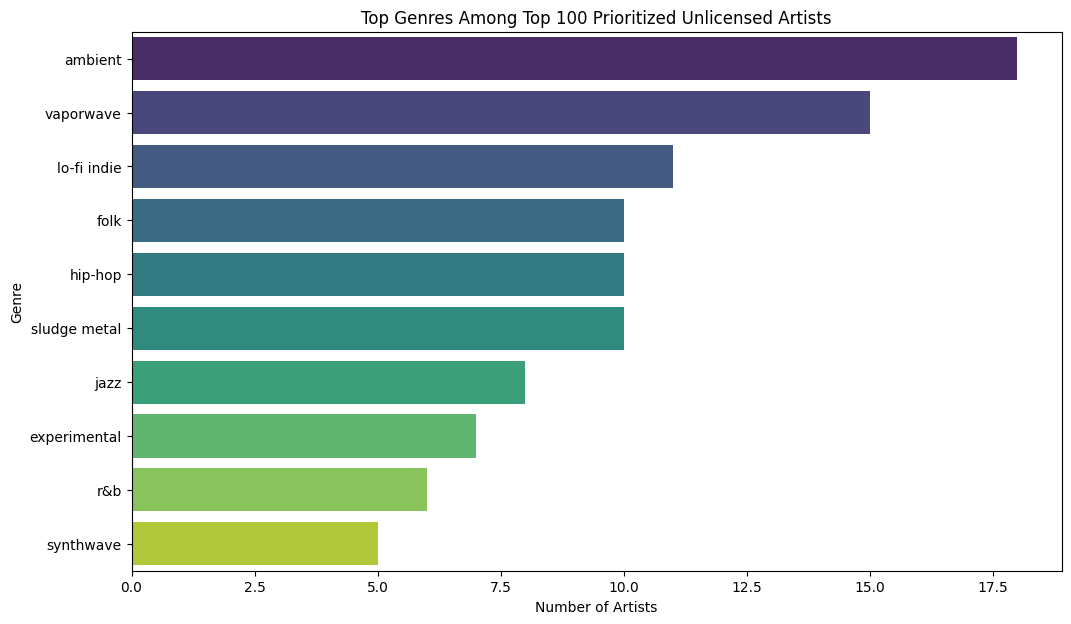

In [6]:
# Analyze the distribution of genres among the top 100 prioritized artists
top_n = 100  # We can adjust this number as needed
top_artists_genres = prioritized_artists.head(top_n)['most_listened_genre'].value_counts().reset_index()
top_artists_genres.columns = ['genre', 'count']

print(f"\nGenre distribution among the top {top_n} prioritized artists:")
display(top_artists_genres)

# Visualize the genre distribution
plt.figure(figsize=(12, 7))
sns.barplot(x='count', y='genre', data=top_artists_genres, palette='viridis')
plt.title(f'Top Genres Among Top {top_n} Prioritized Unlicensed Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Genre')
plt.show()

## Analyzing Engagement within Top Genres

To better understand the value proposition of the top prioritized artists, let's examine the average engagement scores for the most prevalent genres among these artists. This can highlight genres where users are particularly engaged, indicating potential high-value content acquisition opportunities.


Average engagement score for the top 100 artists by genre:


,genre,average_engagement_score
8,synthwave,0.334842
5,lo-fi indie,0.332097
3,hip-hop,0.331524
1,experimental,0.325719
6,r&b,0.323249
4,jazz,0.317616
2,folk,0.316657
9,vaporwave,0.311117
7,sludge metal,0.309210
0,ambient,0.306015


/tmp/ipython-input-4167429503.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_engagement_score', y='genre', data=genre_engagement_sorted, palette='viridis')


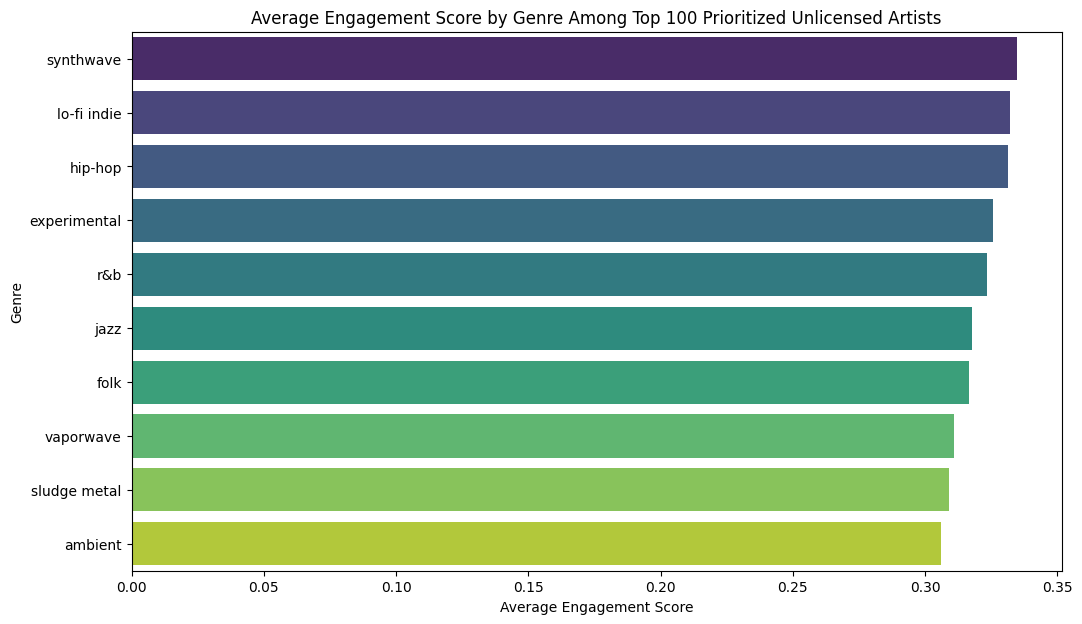

In [7]:
# Calculate the average engagement score for each of the top genres
genre_engagement = prioritized_artists.head(top_n).groupby('most_listened_genre')['avg_engagement_score'].mean().reset_index()
genre_engagement.columns = ['genre', 'average_engagement_score']

# Sort by average engagement score
genre_engagement_sorted = genre_engagement.sort_values(by='average_engagement_score', ascending=False)

print(f"\nAverage engagement score for the top {top_n} artists by genre:")
display(genre_engagement_sorted)

# Visualize the average engagement score by genre
plt.figure(figsize=(12, 7))
sns.barplot(x='average_engagement_score', y='genre', data=genre_engagement_sorted, palette='viridis')
plt.title(f'Average Engagement Score by Genre Among Top {top_n} Prioritized Unlicensed Artists')
plt.xlabel('Average Engagement Score')
plt.ylabel('Genre')
plt.show()